In [1]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy import stats

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from platform import python_version


print('Python version', python_version())
print('Numpy version', np.__version__)
print('Scipy version', sp.__version__)
print('Pandas version', pd.__version__)
print('Matplotlib version', mpl.__version__)
###############################################

#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False


%config InlineBackend.figure_formats = {'png', 'retina'}
%load_ext autoreload
%autoreload 2

Python version 3.13.1
Numpy version 2.2.2
Scipy version 1.15.1
Pandas version 2.2.3
Matplotlib version 3.10.0


# <font color='orange'>Loan prediction -- Data preparation</font>

## Load and explore the data set

In [2]:
import pandas as pd

loan_df = pd.read_csv('data/loans/Training_Data.csv')
loan_df.head()
loan_df.info()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Look at the first few rows of the dataset

In [3]:
loan_df.head(1)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0


Check the summary information about the data set.
- How many samples are there ?
- Are there columns with missing values ?

there are 45342 

there is not column with missing values

Sample only 100,000 rows from the dataframe to work with.

In [4]:
Sample  = loan_df.head(100000)

In [5]:
Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 100000 non-null  int64 
 1   Income             100000 non-null  int64 
 2   Age                100000 non-null  int64 
 3   Experience         100000 non-null  int64 
 4   Married/Single     100000 non-null  object
 5   House_Ownership    100000 non-null  object
 6   Car_Ownership      100000 non-null  object
 7   Profession         100000 non-null  object
 8   CITY               100000 non-null  object
 9   STATE              100000 non-null  object
 10  CURRENT_JOB_YRS    100000 non-null  int64 
 11  CURRENT_HOUSE_YRS  100000 non-null  int64 
 12  Risk_Flag          100000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 9.9+ MB


Take a quick look at the numeric column statistics.  
Is there anything unusual?

In [6]:
Sample.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Take a quick look at the categorical column statistics.  
Are there any columns that you might remove?

In [7]:
Sample.describe(include='object')

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,100000,100000,100000,100000,100000,100000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,89763,92088,69665,2426,519,11255


## Data preprocessing

Duplicate the original dataframe.

In [8]:
df = loan_df.copy()

List the column data types.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Drop the columns `Id`, `Profession`, `CITY`, and `STATE` for now.  
To include `Profession` and `STATE` to the modeling, we could manually bin ```Profession``` into smaller   
    number of groups and ```STATE``` into regions.

In [9]:
df.drop(columns=['Id', 'Profession', 'CITY', 'STATE'], inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1


Look at unique values and counts of the remaining categorical columns.  

**Questions**<br>
- Which columns require label/ordinal encoding?  
- Which columns require one-hot encoding?

**Answer**<br>

one hot : Married/Single	, Car_Ownership , House_Ownership

label/ordinal : Profession, CITY, STATE (which already drop)

Apply label/ordinal encoding to columns (if any)

Apply one-hot encoding to column (if any)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
enc_onehot = OneHotEncoder(handle_unknown='ignore', 
                           drop='if_binary', dtype=int)
onehot_columns = ['House_Ownership', 'Car_Ownership','Married/Single']
onehot_data = enc_onehot.fit_transform(df[onehot_columns])

onehot_df = pd.DataFrame(onehot_data.toarray(), 
                         columns=enc_onehot.get_feature_names_out(onehot_columns))

df = df.drop(onehot_columns, axis=1); 
df = pd.concat([df, onehot_df], axis=1)
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Married/Single_single
0,1303834,23,3,3,13,0,0,0,1,0,1
1,7574516,40,10,9,13,0,0,0,1,0,1
2,3991815,66,4,4,10,0,0,0,1,0,0
3,6256451,41,2,2,12,1,0,0,1,1,1
4,5768871,47,11,3,14,1,0,0,1,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Income                        252000 non-null  int64
 1   Age                           252000 non-null  int64
 2   Experience                    252000 non-null  int64
 3   CURRENT_JOB_YRS               252000 non-null  int64
 4   CURRENT_HOUSE_YRS             252000 non-null  int64
 5   Risk_Flag                     252000 non-null  int64
 6   House_Ownership_norent_noown  252000 non-null  int64
 7   House_Ownership_owned         252000 non-null  int64
 8   House_Ownership_rented        252000 non-null  int64
 9   Car_Ownership_yes             252000 non-null  int64
 10  Married/Single_single         252000 non-null  int64
dtypes: int64(11)
memory usage: 21.1 MB


Rename the target variable name to `Target`

In [13]:
df.rename(columns={'Risk_Flag':'Target'}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Income                        252000 non-null  int64
 1   Age                           252000 non-null  int64
 2   Experience                    252000 non-null  int64
 3   CURRENT_JOB_YRS               252000 non-null  int64
 4   CURRENT_HOUSE_YRS             252000 non-null  int64
 5   Target                        252000 non-null  int64
 6   House_Ownership_norent_noown  252000 non-null  int64
 7   House_Ownership_owned         252000 non-null  int64
 8   House_Ownership_rented        252000 non-null  int64
 9   Car_Ownership_yes             252000 non-null  int64
 10  Married/Single_single         252000 non-null  int64
dtypes: int64(11)
memory usage: 21.1 MB


70/30 train-test split 

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)


In [16]:
X_train = train.drop(columns=['Target'])
y_train = train['Target']
X_test = test.drop(columns=['Target'])
y_test = test['Target']

# <font color='orange'>Random Forest</font>

**Do the following:**:
- Fit random forest with default hyperparameters to the train data
- Generate the classification reports on the train and test data.
- Determine the f1-score by using K-fold CV on the train data.
- Tune the model hyperparameters.
- Determine the f1-score of the tuned model by using K-fold CV on the whole dataset. 

## Fit Random forest model

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Evaluate performance

### Train and test performance

In [23]:
# Evaluate the performance over the train data
from sklearn.metrics import classification_report

print(classification_report(y_train, rf_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96    154675
           1       0.72      0.81      0.76     21725

    accuracy                           0.94    176400
   macro avg       0.85      0.88      0.86    176400
weighted avg       0.94      0.94      0.94    176400



### K-fold Cross-validation

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

scoring_metrics = ['accuracy','precision_macro','recall_macro','f1_macro']
scores = cross_validate(RandomForestClassifier(), X_train,y_train, 
                        scoring=scoring_metrics, cv = 5, return_train_score= False)
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,6.885383,0.376191,0.898951,0.767948,0.744951,0.755666
1,6.676600,0.375815,0.898328,0.765598,0.751322,0.758158
2,6.502407,0.375946,0.897364,0.763467,0.746321,0.754452
3,6.733026,0.376329,0.896854,0.762739,0.739007,0.750017
4,6.566033,0.398723,0.897988,0.765581,0.742028,0.752973


In [25]:
scores_df.mean()

fit_time                6.672690
score_time              0.380601
test_accuracy           0.897897
test_precision_macro    0.765067
test_recall_macro       0.744726
test_f1_macro           0.754253
dtype: float64

## Model Tuning

- Perform Grid-search CV on `criterion`, `max_depth`, `max_features`, `n_estimators` by using F1
as the scoring metric.
- Show the tuned hyperparameter sets and the corresponding scores.
- Perform K-fold CV on the whole dataset using the tuned hyperparameters and compare the performance
results with the untuned model.

### Grid-search CV

In [27]:
from sklearn.model_selection import GridSearchCV


# Parameters for tuning
K = 10
param_grid = [{'n_estimators':[20, 50, 100], 
               'max_depth': [5, 10, 15, None],
               'max_features': ['sqrt', 'log2', None],
                'criterion': ['gini', 'entropy']}]
print("Tuning hyper-parameters ...")
rf_gridsearch = GridSearchCV(RandomForestClassifier(), param_grid, cv = K, scoring = 'f1_macro')
rf_gridsearch.fit(X_train, y_train)

Tuning hyper-parameters ...


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, None],
                          'max_features': ['sqrt', 'log2', None],
                          'n_estimators': [20, 50, 100]}],
             scoring='f1_macro')

,params,mean_test_score
65,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}",0.755824
71,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'n_estimators': 100}",0.755290
29,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}",0.755184
28,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}",0.755146
63,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 20}",0.755109
66,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 20}",0.755031
70,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'n_estimators': 50}",0.754816
35,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}",0.754806
31,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}",0.754776
27,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 20}",0.754721


Best Estimator: 
RandomForestClassifier(criterion='entropy')

Best Parameters: 
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

Best Test Score: 
0.7558236451941169



### Evaluate the performance of the tuned model.

In [29]:
gridsearch_df = pd.DataFrame(rf_gridsearch.cv_results_) 
pd.set_option('display.max_colwidth', 100)
gridsearch_df[['params','mean_test_score']].sort_values('mean_test_score', ascending=False)[:10]

print(f"Best Estimator: \n{rf_gridsearch.best_estimator_}\n")
print(f"Best Parameters: \n{rf_gridsearch.best_params_}\n")
print(f"Best Test Score: \n{rf_gridsearch.best_score_}\n")

tuned_rf_clf = rf_gridsearch.best_estimator_ # Tuned model

,params,mean_test_score
65,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}",0.755824
71,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'n_estimators': 100}",0.755290
29,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}",0.755184
28,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}",0.755146
63,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 20}",0.755109
66,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 20}",0.755031
70,"{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'n_estimators': 50}",0.754816
35,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}",0.754806
31,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}",0.754776
27,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 20}",0.754721


Best Estimator: 
RandomForestClassifier(criterion='entropy')

Best Parameters: 
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

Best Test Score: 
0.7558236451941169



### Look at the feature importance of the tuned model

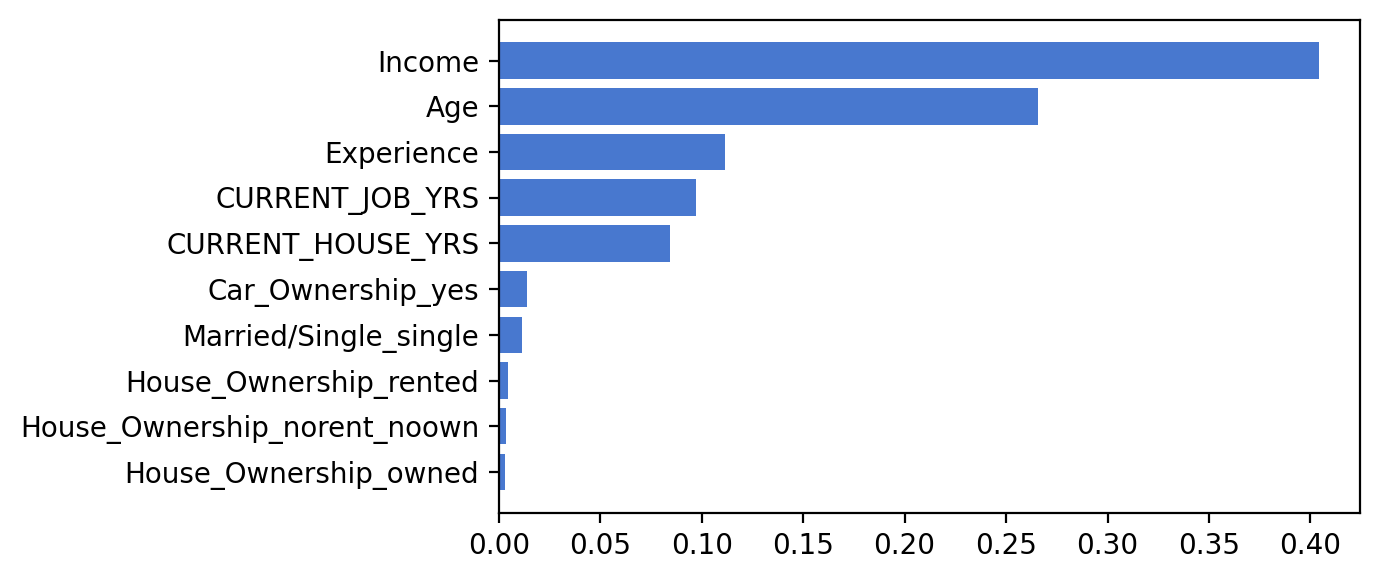

In [30]:
import matplotlib.pyplot as plt

feature_list = pd.DataFrame({'feature':X_train.columns, 'value':rf_clf.feature_importances_})
feature_list_sorted = feature_list.sort_values('value')
feature_list_sorted

plt.figure(figsize=(7,3))
plt.barh(range(0,len(feature_list_sorted.index)), 
         feature_list_sorted.value, tick_label=feature_list_sorted.feature)
plt.tight_layout();

**Questions**<br><br>

From the tuned model,
1. What are the values of tuned hyperparameters?
2. How is its performance better than the untuned model?
3. What are the three most important features?

**Answer**<br><br>

1. The values of tuned hyperparameters? with using random forest are
{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

2. 

3. Three most importance features are Income, Age, and Experience (in order)

# <font color='orange'>Gradient Boosting</font>

**Do the following:**:
- Fit gradient boosting with default hyperparameters to the train data
- Generate the classification reports on the train and test data.
- Determine the f1-score by using K-fold CV on the train data.
- Tune the model hyperparameters.
- Determine the f1-score of the tuned model by using K-fold CV on the whole dataset. 

## Fit Gradient boosting model

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Fit Gradient Boosting model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, GridSearchCV

# Fit Gradient Boosting model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# Generate classification reports on train and test data
print("Train Classification Report:")
print(classification_report(y_train, gb_clf.predict(X_train)))

print("Test Classification Report:")
print(classification_report(y_test, gb_clf.predict(X_test)))

# Determine the f1-score using K-fold CV on the train data
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(GradientBoostingClassifier(), X_train, y_train, 
                        scoring=scoring_metrics, cv=5, return_train_score=False)
scores_df = pd.DataFrame(scores)
print("K-fold CV Scores on Train Data:")
print(scores_df.mean())

# Tune the model hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print(f"Best Parameters: {grid_search.best_params_}")
tuned_gb_clf = grid_search.best_estimator_

# Determine the f1-score of the tuned model using K-fold CV on the whole dataset
tuned_scores = cross_validate(tuned_gb_clf, df.drop(columns=['Target']), df['Target'], 
                              scoring=scoring_metrics, cv=5, return_train_score=False)
tuned_scores_df = pd.DataFrame(tuned_scores)
print("K-fold CV Scores of Tuned Model on Whole Dataset:")
print(tuned_scores_df.mean())

GradientBoostingClassifier()

Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    154675
           1       0.86      0.00      0.00     21725

    accuracy                           0.88    176400
   macro avg       0.87      0.50      0.47    176400
weighted avg       0.87      0.88      0.82    176400

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.71      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.79      0.50      0.47     75600
weighted avg       0.86      0.88      0.82     75600

K-fold CV Scores on Train Data:
fit_time                6.245302
score_time              0.032840
test_accuracy           0.877012
test_precision_macro    0.831021
test_recall_macro       0.500928
test_f1_macro           0.469158
dtype: float64


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
K-fold CV Scores of Tuned Model on Whole Dataset:
fit_time                16.914631
score_time               0.242669
test_accuracy            0.885710
test_precision_macro     0.737534
test_recall_macro        0.607112
test_f1_macro            0.635174
dtype: float64


## Evaluate performance

### Train and test performance

### K-fold Cross-validation

## Model Tuning

- Perform Grid-search CV on `max_depth`, `n_estimators`, `max_features`, `learning_rate` by using F1
as the scoring metric.
- Show the tuned hyperparameter sets and the corresponding scores.
- Perform K-fold CV on the whole dataset using the tuned hyperparameters and compare the performance
results with the untuned model.

### Grid-search CV

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid-search CV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Show the tuned hyperparameter sets and the corresponding scores
gridsearch_df = pd.DataFrame(grid_search.cv_results_)
pd.set_option('display.max_colwidth', 100)
print(gridsearch_df[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False)[:10])

# Best parameters and estimator
print(f"Best Parameters: {grid_search.best_params_}")
tuned_gb_clf = grid_search.best_estimator_

# Determine the f1-score of the tuned model using K-fold CV on the whole dataset
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
tuned_scores = cross_validate(tuned_gb_clf, df.drop(columns=['Target']), df['Target'], 
                              scoring=scoring_metrics, cv=5, return_train_score=False)
tuned_scores_df = pd.DataFrame(tuned_scores)
print("K-fold CV Scores of Tuned Model on Whole Dataset:")
print(tuned_scores_df.mean())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro')

                                                                                 params  \
53  {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}   
50  {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}   
49  {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}   
52  {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}   
32  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}   
35  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}   
47  {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}   
44  {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}   
48   {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}   
51   {'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 50}   

### Evaluate the performance of the tuned model.

### Look at the feature importance of the tuned model

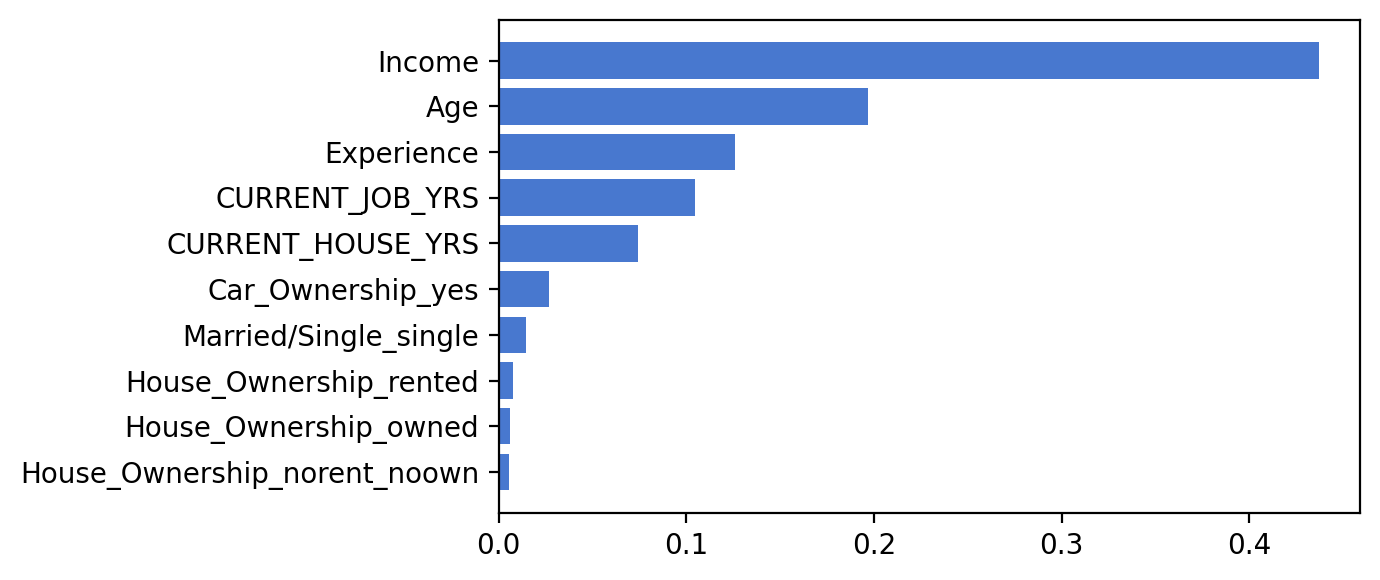

In [18]:
feature_list = pd.DataFrame({'feature':X_train.columns, 'value':tuned_gb_clf.feature_importances_})
feature_list_sorted = feature_list.sort_values('value')
feature_list_sorted

plt.figure(figsize=(7,3))
plt.barh(range(0,len(feature_list_sorted.index)), 
         feature_list_sorted.value, tick_label=feature_list_sorted.feature)
plt.tight_layout();

**Questions**<br><br>

From the tuned GB model, 
- What are the values of tuned hyperparameters?
- How is its performance better than the untuned GB model and the tuned RF model?
- What are the three most important features?